# Simulation of Phonon Scattering in Single Crystal Silicon

Instrument: ARCS
* Ei=100meV
* Fermi chopper: 600 Hz
* T0: 120Hz
 
Sample: silicon


## Step 0. some goodies

In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import histogram.hdf as hh, histogram as H

/home/lj7/anaconda2/envs/mcvine/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# where am I?
import os
PWD=os.path.abspath(".")
print PWD
# It should be the directory where this jupyter notebook is

/home/lj7/dv/mcvine/training/ARCS


## Step 1. Create dir structure

In [2]:
# Create a working directory for the simulation
# Change the following line to your own directory!!!
# This directory should not exist yet. It will be created later.
workdir = "/SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison"

In [5]:
# Prepare sample description.
# It will be used to generate files for the simulation
# and will be used in reduction and analysis

In [6]:
%%file Si.yml
name: Si
chemical_formula: Si2
lattice: 
 constants: 5.490700041, 5.490700041, 5.490700041, 90, 90, 90
 basis_vectors:
  - 5.490700041, 0, 0
  - 0, 5.490700041, 0
  - 0, 0, 5.490700041
 primitive_basis_vectors:
  - 0.0, 2.71526503565, 2.71526503565
  - 2.71526503565, 0.0, 2.71526503565
  - 2.71526503565, 2.71526503565, 0.0
excitations:
 - type: phonon
   idf_dir: /SNS/users/linjiao/simulations/samples/Si/April2016-TSeries/100K-50cube
orientation:
 u: -1, 1, -1
 v: 2, 1, -1
shape: hollowCylinder in_radius="5./8*inch" out_radius="1.*inch" height="1.5*inch"
temperature: 100*K

Writing Si.yml


In [7]:
# let mcvine workflow scaffolding helps you build the simulation directory

In [12]:
!mcvine workflow singlecrystal --outdir={workdir} --type=DGS \
    --instrument=ARCS --sample=Si.yml

/home/lj7/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /home/lj7/anaconda2/envs/mcvine.
  warnings.warn(msg)


In [28]:
# change to local working directory
%cd {workdir}

/SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison


In [14]:
# list dir contents
!ls .

beam  README.md  sampleassembly  scattering


In [15]:
# move sample yml file here
!mv {PWD}/Si.yml .

In [16]:
!ls .

beam  README.md  sampleassembly  scattering  Si.yml


## Step 2. Setup beam simulation

In [18]:
# In this example we won't simulate a new beam but will reuse an existing beam
# First remove the beam dir
# !!! Be very careful with rm -rf !!!
!rm -rf beam
# Then make a symlink
!ln -s /SNS/users/lj7/simulations/ARCS/beam/100meV beam

In [19]:
ls -l {workdir}

total 20
lrwxrwxrwx 1 lj7 users  43 Aug  4 08:45 beam -> /SNS/users/lj7/simulations/ARCS/beam/100meV/
-rw-r--r-- 1 lj7 users  73 Aug  1 20:12 README.md
drwxr-xr-x 1 lj7 users  83 Aug  4 08:43 sampleassembly/
drwxr-xr-x 1 lj7 users  47 Aug  4 08:42 scattering/
-rw-r--r-- 1 lj7 users 579 Aug  4 08:39 Si.yml


<IPython.core.display.Javascript object>


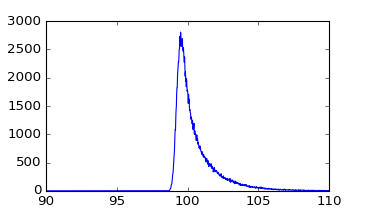

In [20]:
# check beam energy profile
import histogram.hdf as hh
ie = hh.load("beam/out/ienergy.h5")
plt.plot(ie.energy, ie.I)

## Step 3. Check and update sample assembly

In [3]:
%cd {workdir}

/SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison


** Different from the example in mcvine training material, here we are going to use an existing sample assembly **

In [22]:
# first move the existing sample assembly to a different name
! mv sampleassembly/ sampleassembly-by-mcvine-scaffolding

In [1]:
# This is where the prebuilt sample assembly is
sampleassembly_dir = "/SNS/users/lj7/simulations/samples/Si/demo/100K"

In [24]:
# copy it to the working dir
!rsync -avzL {sampleassembly_dir}/ sampleassembly/

sending incremental file list
created directory sampleassembly
./
.sampleassembly.xml.swp
Si-scatterer.xml
Si.xyz
sampleassembly.xml
Si-phonons/
Si-phonons/DOS
Si-phonons/FORCE_CONSTANTS
Si-phonons/Omega2
Si-phonons/POSCAR
Si-phonons/Polarizations
Si-phonons/Qgridinfo
Si-phonons/compute.py
Si-phonons/dos-withbroadening.dat
Si-phonons/run.sh

sent 72,300,929 bytes  received 315 bytes  11,123,268.31 bytes/sec
total size is 91,492,002  speedup is 1.27


In [4]:
ls -l

total 24
lrwxrwxrwx 1 lj7 users  43 Aug  4 08:45 beam -> /SNS/users/lj7/simulations/ARCS/beam/100meV/
-rw-r--r-- 1 lj7 users  73 Aug  1 20:12 README.md
drwxr-xr-x 1 lj7 users 138 Jun 22 10:23 sampleassembly/
drwxr-xr-x 1 lj7 users  83 Aug  4 08:43 sampleassembly-by-mcvine-scaffolding/
drwxr-xr-x 1 lj7 users  47 Aug  4 08:42 scattering/
-rw-r--r-- 1 lj7 users 579 Aug  4 08:39 Si.yml


In [36]:
# check sample assembly files
#! cat sampleassembly/Si-scatterer.xml
#!cat sampleassembly/sampleassembly.xml

## Step 4. Scattering sim

In [5]:
%cd "{workdir}/scattering"

/SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison/scattering


In [6]:
ls .

scripts/  template/


### Step 4.1 Staging the simulation files

In [7]:
# We need both a local work dir and a remote workdir (at nesrc cluster)
# Let us be more explicit about that
local_workdir = workdir

In [15]:
!ls {local_workdir}

beam	   sampleassembly			 scattering
README.md  sampleassembly-by-mcvine-scaffolding  Si.yml


In [29]:
cluster = "edison.nersc.gov"
remote_workdir = "/scratch2/scratchdirs/linjiao/Si/08042016/T100K"

In [10]:
# create remote workdir
!ssh {cluster} mkdir -p {remote_workdir} 2>/dev/null

In [14]:
# uncomment the following to check if the remote workdir was created correctly
# !ssh {cluster} ls -al {remote_workdir}

In [ ]:
# Configuration file for simulation
# A node at nersc has 24 cores

In [16]:
%%file {local_workdir}/scattering/sim.yml

cluster:
  nodes: 24
instrument:
  name: arcs
scatter:
  ncount: 1e6
  multiple_scattering: off
  template: ./template

Writing /SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison/scattering/sim.yml


In [44]:
# staging by copying files to remote cluster
!rsync -avL {local_workdir}/ {cluster}:{remote_workdir}/

  
 *****************************************************************
 *                                                               *
 *                      NOTICE TO USERS                          *
 *                      ---------------                          *
 *                                                               *
 *  Lawrence Berkeley National Laboratory operates this          *
 *  computer system under contract to the U.S. Department of     *
 *  Energy.  This computer system is the property of the United  *
 *  States Government and is for authorized use only.  *Users    *
 *  (authorized or unauthorized) have no explicit or implicit    *
 *  expectation of privacy.*                                     *
 *                                                               *
 *  Any or all uses of this system and all files on this system  *
 *  may be intercepted, monitored, recorded, copied, audited,    *
 *  inspected, and disclosed to site, Department of Energy,

## Step 4.2 Test drive

In [18]:
# one last check of sim config
!ssh {cluster} cat {remote_workdir}/scattering/sim.yml 2>/dev/null


cluster:
  nodes: 24
instrument:
  name: arcs
scatter:
  ncount: 1e6
  multiple_scattering: off
  template: ./template

In [19]:
# some cluster may need additional script to set up env vars
setupenv_cluster = " "

In [ ]:
# create a job submission script

In [56]:
%%file {local_workdir}/scattering/job_31.0.sh
#!/bin/bash -l
#SBATCH -p regular
#SBATCH --qos=premium
#SBATCH -N 1
#SBATCH --tasks-per-node=24
#SBATCH -t 0:29:59
#SBATCH -J Si31.0-100K

. /global/homes/l/linjiao/.use-mcvine-in-conda

./scripts/sim.py --angle=31.0

Writing /SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison/scattering/job_31.0.sh


In [57]:
# copy to remote cluster
!rsync -av {local_workdir}/ {cluster}:{remote_workdir}/ 2>/dev/null

sending incremental file list
cannot delete non-empty directory: beam
scattering/
scattering/job_31.0.sh

sent 1,764 bytes  received 176 bytes  554.29 bytes/sec
total size is 91,520,574  speedup is 47,175.55


In [61]:
# cmd to submit the job
cmd = "sbatch job_31.0.sh"

In [64]:
# full cmd to submit the job
cmd2 = "bash -c 'cd %(remote_workdir)s/scattering; " % locals()
cmd2 += "%(cmd)s </dev/null >log.submit_31.0 2>&1 &'" % locals()
print cmd2

bash -c 'cd /scratch2/scratchdirs/linjiao/Si/08042016/T100K/scattering; sbatch job_31.0.sh </dev/null >log.submit_31.0 2>&1 &'


In [69]:
# submit the job to the remote cluster
!ssh {cluster} "{cmd2}"

  
 *****************************************************************
 *                                                               *
 *                      NOTICE TO USERS                          *
 *                      ---------------                          *
 *                                                               *
 *  Lawrence Berkeley National Laboratory operates this          *
 *  computer system under contract to the U.S. Department of     *
 *  Energy.  This computer system is the property of the United  *
 *  States Government and is for authorized use only.  *Users    *
 *  (authorized or unauthorized) have no explicit or implicit    *
 *  expectation of privacy.*                                     *
 *                                                               *
 *  Any or all uses of this system and all files on this system  *
 *  may be intercepted, monitored, recorded, copied, audited,    *
 *  inspected, and disclosed to site, Department of Energy,

In [30]:
# sanity check
print remote_workdir

/scratch2/scratchdirs/linjiao/Si/08042016/T100K


In [68]:
# check job status
!ssh {cluster} "squeue -u linjiao" 2>/dev/null

             JOBID       USER  ACCOUNT       NAME  PARTITION    QOS NODES   TIME_LIMIT       TIME   ST           START_TIME
           1704803    linjiao    m1503 Si31.0-100    regular premiu     1        30:00       3:19    R  2016-08-05T11:26:52


** Timing: n=3e7. 0.5 hours **

## Step 4.3 Run all angles

In [72]:
# change ncount to 3e6

In [82]:
%%file {local_workdir}/scattering/sim.yml

cluster:
  nodes: 24
instrument:
  name: arcs
scatter:
  ncount: 3e6
  multiple_scattering: off
  template: ./template

Overwriting /SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison/scattering/sim.yml


In [84]:
# may want to remove the 30.0 result
# !ssh {cluster} rm -rf {remote_workdir}/scattering/work_30.0 2>/dev/null

In [89]:
# new job submission script that runs a bunch of angles

In [73]:
%%file {local_workdir}/scattering/job_-5,90.1,2.sh
#!/bin/bash -l
#SBATCH -p regular
#SBATCH --qos=premium
#SBATCH -N 1
#SBATCH --tasks-per-node=24
#SBATCH -t 12:00:00
#SBATCH -J Si-5,90.5,2-100K

. /global/homes/l/linjiao/.use-mcvine-in-conda

./scripts/sim.py --angles="arange(-5,90.1,2.)"


Writing /SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison/scattering/job_-5,90.1,2.sh


In [85]:
# staging
!rsync -avL {local_workdir}/ {cluster}:{remote_workdir}/ 2>/dev/null

sending incremental file list
scattering/
scattering/sim.yml

sent 2,418 bytes  received 113 bytes  723.14 bytes/sec
total size is 116,345,176  speedup is 45,968.07


In [86]:
# cmd to submit the job
cmd = "sbatch job_-5,90.1,2.sh"
cmd2 = "bash -c 'cd %(remote_workdir)s/scattering; " % locals()
cmd2 += "%(cmd)s </dev/null >log.submit_-5,90.1,2 2>&1 &'" % locals()
print cmd2

bash -c 'cd /scratch2/scratchdirs/linjiao/Si/08042016/T100K/scattering; sbatch job_-5,90.1,2.sh </dev/null >log.submit_-5,90.1,2 2>&1 &'


In [87]:
# submit the job to the cluster
!ssh {cluster} "{cmd2}"

  
 *****************************************************************
 *                                                               *
 *                      NOTICE TO USERS                          *
 *                      ---------------                          *
 *                                                               *
 *  Lawrence Berkeley National Laboratory operates this          *
 *  computer system under contract to the U.S. Department of     *
 *  Energy.  This computer system is the property of the United  *
 *  States Government and is for authorized use only.  *Users    *
 *  (authorized or unauthorized) have no explicit or implicit    *
 *  expectation of privacy.*                                     *
 *                                                               *
 *  Any or all uses of this system and all files on this system  *
 *  may be intercepted, monitored, recorded, copied, audited,    *
 *  inspected, and disclosed to site, Department of Energy,

In [92]:
# check job status
!ssh {cluster} "squeue -u linjiao" 2>/dev/null

             JOBID       USER  ACCOUNT       NAME  PARTITION    QOS NODES   TIME_LIMIT       TIME   ST           START_TIME


## Step 5. Reduction

In [96]:
# copy data back to local dir
%cd "{local_workdir}/scattering"
!mkdir nxs

/SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison/scattering


In [97]:
!scp {cluster}:{remote_workdir}/scattering/work_*/sim_*.nxs {local_workdir}/scattering/nxs/ 2>/dev/null

sim_-1.0.nxs                                  100% 9971KB   1.6MB/s   00:06    
sim_-3.0.nxs                                  100% 9963KB   9.7MB/s   00:01    
sim_-5.0.nxs                                  100% 9947KB   1.4MB/s   00:07    
sim_1.0.nxs                                   100%   10MB   1.2MB/s   00:08    
sim_11.0.nxs                                  100% 9982KB   3.3MB/s   00:03    
sim_13.0.nxs                                  100%   10MB   3.3MB/s   00:03    
sim_15.0.nxs                                  100% 9991KB   1.4MB/s   00:07    
sim_17.0.nxs                                  100% 9998KB   2.0MB/s   00:05    
sim_19.0.nxs                                  100%   10MB   3.3MB/s   00:03    
sim_21.0.nxs                                  100%   10MB   3.3MB/s   00:03    
sim_23.0.nxs                                  100% 9992KB 999.2KB/s   00:10    
sim_25.0.nxs                                  100% 9984KB   1.2MB/s   00:08    
sim_27.0.nxs                            

First we reduce event-mode nexus data for each angle using Mantid

In [99]:
# reduce tof events to E events
# this takes about 13 minutes
!time mcvine workflow sxr reduce --type batch \
    --eaxis -5 75 0.5 --psi-axis -5 90.1 2. --eiguess 100 \
    --eventnxs nxs/sim_%s.nxs --out $PWD/nxs/reduced_%s.nxs\
    > log.reduce

/home/lj7/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /home/lj7/anaconda2/envs/mcvine.
  warnings.warn(msg)
/home/lj7/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
11010.23user 624.18system 12:25.15elapsed 1561%CPU (0avgtext+0avgdata 744908maxresident)k
768488inputs+2936outputs (0major+35153144minor)pagefaults 0swaps


In [100]:
# create configuration file for getting a slice

In [101]:
%%file slice_111.yml
Eaxis:
 min: 0
 max: 75
 N: 151
Q_projections:
 U:
  proj: -1,1,-1
  proj_name: -H,H,-H
  min: -6
  max: 6
  N: 241
 V:
  proj: 1,.5,-.5
  proj_name: H,0.5H,-0.5H
  min: -5.45
  max: -5.15
  N: 1
 W:
  proj: 0,-1,-1
  proj_name: 0,-K,-K
  min: -0.3
  max: 0.3
  N: 1

Writing slice_111.yml


In [104]:
ls

job_30.0.sh  job_-5,90.1,2.sh  nxs/      sim.yml        template/
job_31.0.sh  log.reduce        scripts/  slice_111.yml


In [105]:
!time mcvine workflow sxr slice \
    --sample {local_workdir}/Si.yml \
    --psi-axis -5 90.1 2. \
    --nxs nxs/reduced_%s.nxs \
    --slice slice_111.yml \
    --out slice_111.nxs \
    > log.slice_111

/home/lj7/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /home/lj7/anaconda2/envs/mcvine.
  warnings.warn(msg)
/home/lj7/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
2022.66user 486.50system 1:51.72elapsed 2245%CPU (0avgtext+0avgdata 6104112maxresident)k
659352inputs+1544outputs (0major+9863110minor)pagefaults 0swaps


In [106]:
# convert slice nexus to slice histogram
!mcvine workflow sxr slice2hist slice_111.nxs slice_111.h5

/home/lj7/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /home/lj7/anaconda2/envs/mcvine.
  warnings.warn(msg)
/home/lj7/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load succes

plot z in (0, 1e-05)


<IPython.core.display.Javascript object>


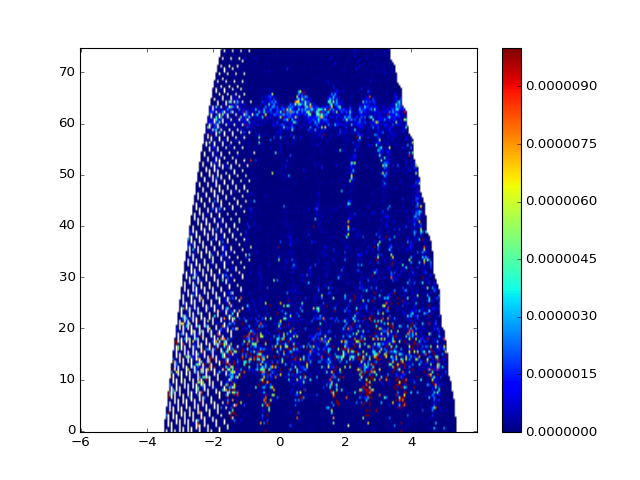

In [108]:
# plot
H.plot(hh.load("./slice_111.h5"), min=0, max=1e-5)

### Comments
This simulation has 2 degrees step size and was not run too long. Result is noisy. It was a quick simulation (~6hours). It is OK. We can run longer on different computing resources.